In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## Business Questions:


Descriptive Analytics

    Sales Analysis: What are the total sales for each product category across different channels and regions? This involves summarizing current sales data to understand what products are performing well.
    Customer Segmentation: How do customers differ in their spending across different product categories? This can involve cluster analysis to identify different types of customers based on their purchasing patterns.
    Market Analysis: What are the differences in purchasing patterns across regions? Are there specific product categories that are more popular in certain regions?

Inferential Analytics

    Comparative Analysis: Is there a significant difference in the average spending on different product categories between the two channels? This could involve hypothesis testing to compare means across groups.
    Association Rules: Are there certain products that are frequently bought together? This could involve using market basket analysis to find associations between different products.
    Regional Preferences: Are there significant differences in purchasing habits across different regions? This could involve statistical tests to compare regional data.

Predictive Analytics

    Sales Forecasting: Can we predict future sales for each product category based on historical data? This would involve using time series analysis or machine learning models for sales forecasting.
    Customer Spending Prediction: Can we predict how much a new customer will spend in each category based on their demographics or initial purchases? This involves building a predictive model.
    Churn Prediction: Can we predict which customers are likely to stop buying (churn) based on their purchasing patterns? This involves identifying patterns that precede churn and building a predictive model.

Looks like the top selling products are Fresh, Milk and Groceries. Numbers are expenditure of clients in monetary units

## Descriptive Statistics

In [100]:
df = pd.read_csv('wholesale.csv')
print (df.head(5) , "\n")
print ((df.sum() / df.sum().sum()) * 100)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185 

Channel              0.003981
Region               0.007653
Fresh               36.112841
Milk                17.442869
Grocery             23.928007
Frozen               9.244453
Detergents_Paper     8.671360
Delicassen           4.588836
dtype: float64


<Figure size 432x504 with 0 Axes>

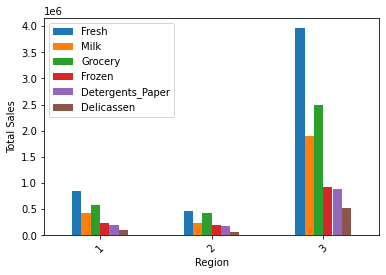

In [101]:
plt.figure(figsize=(6,7))
df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum().plot(kind='bar')
plt.xticks(rotation = 45)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show();

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

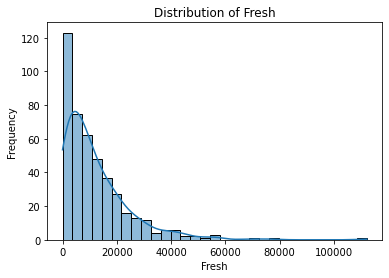

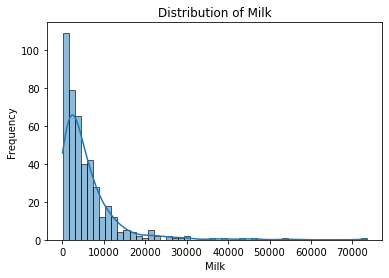

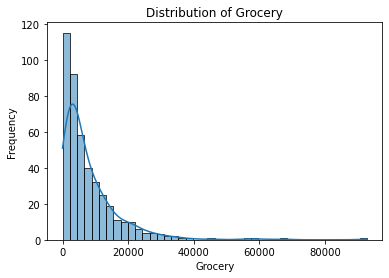

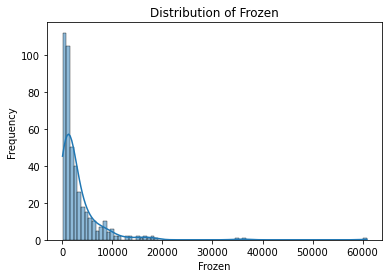

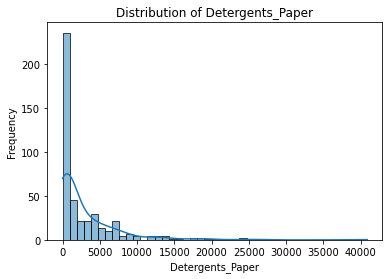

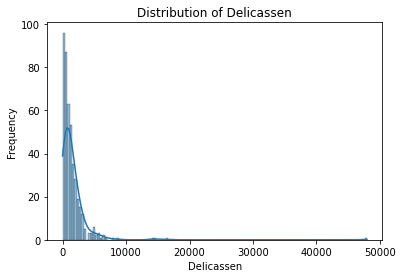

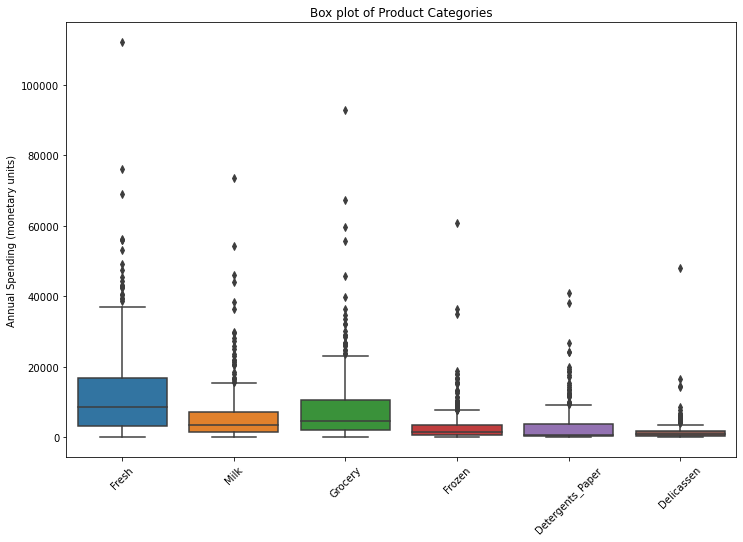

In [102]:
# Basic descriptive statistics for each category
print(df.describe())

# Visualize the distribution of each category with histograms
for column in df.columns[2:]:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for each category to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, 2:])
plt.title('Box plot of Product Categories')
plt.ylabel('Annual Spending (monetary units)')
plt.xticks(rotation=45)
plt.show()

## Probability

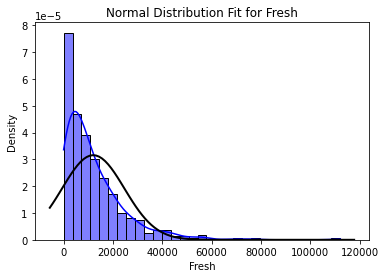

Normal Fit for Fresh: Mean = 12000.3, Std = 12632.95


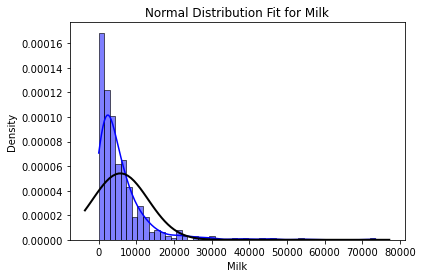

Normal Fit for Milk: Mean = 5796.27, Std = 7371.99


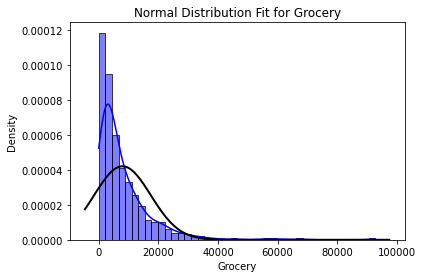

Normal Fit for Grocery: Mean = 7951.28, Std = 9492.36


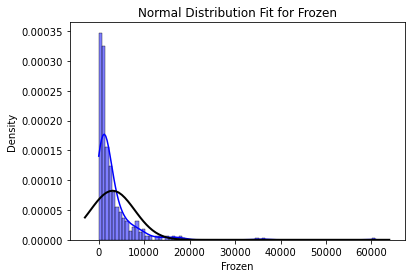

Normal Fit for Frozen: Mean = 3071.93, Std = 4849.15


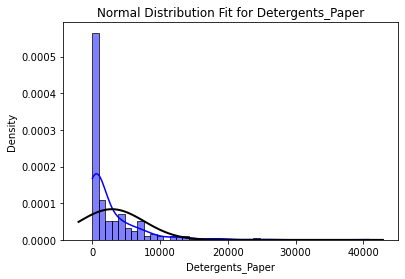

Normal Fit for Detergents_Paper: Mean = 2881.49, Std = 4762.43


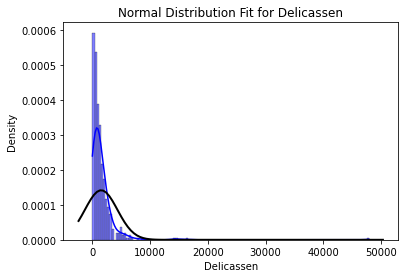

Normal Fit for Delicassen: Mean = 1524.87, Std = 2816.9
Expected number of purchases (lambda) for 'Frozen': 3071.93


In [103]:
# Normal Distribution Fit
for column in df.columns[2:]:
    mu, std = stats.norm.fit(df[column])
    plt.figure()
    sns.histplot(df[column], kde=True, stat='density', color='blue')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Normal Distribution Fit for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()
    print(f"Normal Fit for {column}: Mean = {round(mu, 2)}, Std = {round(std, 2)}")

## Poisson Distribution for 'Frozen'
lambda_frozen = df['Frozen'].mean()
print(f"Expected number of purchases (lambda) for 'Frozen': {round(lambda_frozen, 2)}")

T-test for 'Fresh' between Channels 1 and 2: T-stat=3.59, P-value=0.0


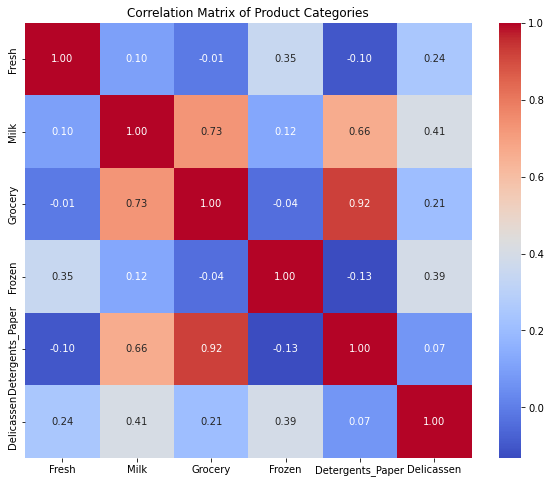

In [104]:

# Comparing the mean spending on 'Fresh' between two channels
t_stat, p_val = stats.ttest_ind(df[df['Channel'] == 1]['Fresh'], df[df['Channel'] == 2]['Fresh'])
print(f"T-test for 'Fresh' between Channels 1 and 2: T-stat={round(t_stat, 2)}, P-value={round(p_val, 2)}")

## Correlations Between Categories
# Heatmap of Pearson correlation coefficients between product categories
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Product Categories')
plt.show()



***Observations:***
- We can see that there is a high correlation  between groceries, detergents and milk. While Groceries has a negative(very low) correlation with frozen and fresh food

## Sampling Distributions

### Studying the confidence interval of the major products consumed

### Fresh

(0.9002982769251917, 13329.246578431324)


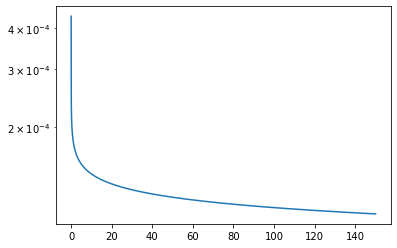

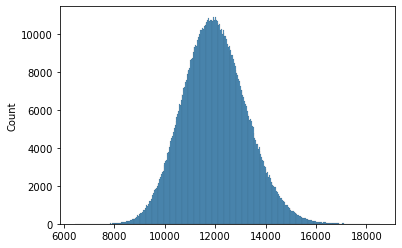

We are 95% confident that in the long-run, the consumption of Fresh food will remain between 10818.54 and 13182.06 monetary units


In [133]:
# Calculate basic statistics for the 'Fresh' category
fresh_mean = np.mean(df['Fresh'])  # Compute the mean spending on 'Fresh' products
fresh_sd = np.std(df['Fresh'], ddof=1)  # Compute the sample standard deviation

# Correct calculation of Gamma distribution parameters
variance_gamma = fresh_sd**2  # Variance, calculated as the square of the standard deviation

# Shape parameter (k) for the Gamma distribution
k_gamma = fresh_mean**2 / variance_gamma  #calculated shape parameter

# Scale parameter (theta) for the Gamma distribution
theta_gamma = variance_gamma / fresh_mean  #calculated scale parameter

# Print the corrected shape and scale parameters
print((k_gamma, theta_gamma))

# Generate a range of values for plotting the Gamma distribution PDF
x = np.linspace(0, 150, 1000000)  # Linear space for the x-axis
y = stats.gamma.pdf(x, a=k_gamma, scale=theta_gamma)  # Gamma PDF values

# Plot the Gamma PDF on a logarithmic scale
plt.yscale('log')
plt.plot(x, y)
plt.show()

# Simulate the distribution of sample means
num_samples_per_mean = 100  # Number of observations per sample mean calculation
num_means = 1000000  # Total number of sample means to generate

# Generate and calculate the sample means
means = [np.random.gamma(k_gamma, theta_gamma, num_samples_per_mean).mean() for _ in range(num_means)]

# Plot the distribution of the calculated sample means
sns.histplot(means)
plt.show()

# Calculating the standard error for 'Fresh'
fresh_se = fresh_sd / np.sqrt(df['Fresh'].shape[0])  # Standard error of the mean

# Calculate the 95% confidence interval for the mean spending on 'Fresh' products
lower = fresh_mean - 1.96 * fresh_se  # Lower bound of the confidence interval
upper = fresh_mean + 1.96 * fresh_se  # Upper bound of the confidence interval

# Print the 95% confidence interval
print(f'We are 95% confident that in the long-run, the consumption of Fresh food will remain between {round(lower,2)} and {round(upper,2)} monetary units')

#### Milk

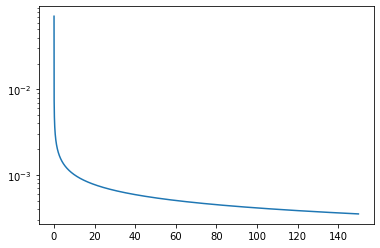

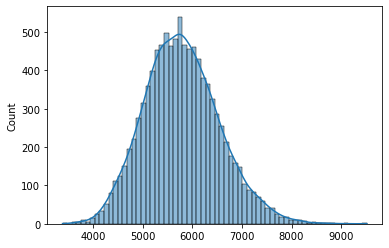

We are 95% confident that the average expenditure on Milk products will fall between 5106.65 and 6485.88, while the mean is 5796.27


In [135]:
# Calculate basic descriptive statistics for the 'Milk' category
milk_mean = np.mean(df['Milk'])  # Compute the mean of 'Milk' spending
milk_st = np.std(df['Milk'], ddof=1)  # Compute the standard deviation 
milk_n = df.shape[0]  # Total number of observations in the dataset

# Calculate the Gamma distribution parameters for modeling 'Milk' spending
variance_gamma = milk_st**2  # Variance, calculated as the square of the standard deviation

# Shape parameter (k) for the Gamma distribution
k_gamma = milk_mean**2 / variance_gamma  # Shape parameter, derived from the mean and variance

# Scale parameter (theta) for the Gamma distribution
theta_gamma = variance_gamma / milk_mean  # Scale parameter, derived from the variance and mean

# Prepare for plotting the Gamma probability density function (PDF)
x = np.linspace(0, 150, 1000000)  # Generate a linear space from 0 to 150 for the x-axis
y = stats.gamma.pdf(x, a=k_gamma, scale=theta_gamma)  # Calculate the Gamma PDF values

# Plot the Gamma PDF on a logarithmic scale for better visualization
plt.yscale('log')
plt.plot(x, y)
plt.show()

# Simulate sampling to estimate the distribution of mean 'Milk' spending
num_samples_per_mean = 100  # Number of 'Milk' expenditure samples per mean calculation
num_means = 10000  # Total number of sample means to generate

# Generate sample means from the Gamma distribution
means = [np.random.gamma(k_gamma, theta_gamma, num_samples_per_mean).mean() for _ in range(num_means)]

#Calculating the Standard Error for 'Milk'
milk_se = milk_st / np.sqrt(milk_n)  # Standard error of the mean

# Plot the distribution of the sample means
sns.histplot(means, kde=True)  # KDE (Kernel Density Estimate) adds a smoothed curve over the histogram
plt.show()

# Calculate the 95% confidence interval for the average 'Milk' expenditure
lower = milk_mean - 1.96 * milk_se  # Lower bound of the 95% CI
upper = milk_mean + 1.96 * milk_se  # Upper bound of the 95% CI

# Print the confidence interval and the mean
print(f'We are 95% confident that the average expenditure on Milk products will fall between {round(lower,2)} and {round(upper,2)}, while the mean is {round(milk_mean,2)}')

### Frozen

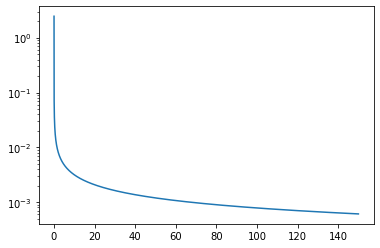

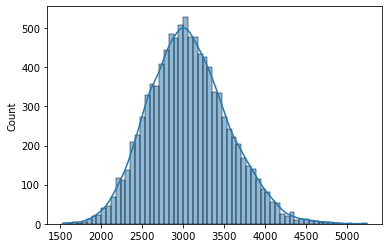

We are 95% confident that the average expenditure on frozen products will fall between 2618.31 and 3525.55, while the mean is 3071.93


In [136]:
# Calculate basic statistics for the 'Frozen' category
frozen_mean = np.mean(df['Frozen'])  # Calculate the mean of 'Frozen' spending
frozen_st = np.std(df['Frozen'], ddof=1)  # Calculate the standard deviation with (ddof=1)
frozen_n = df['Frozen'].shape[0]  # Count the number of observations in 'Frozen'

# Calculate the variance for the Gamma distribution (variance is squared standard deviation)
variance_gamma = frozen_st**2

# Calculate the shape (k) and scale (theta) parameters for the Gamma distribution
k_gamma = frozen_mean**2 / variance_gamma  # Shape parameter
theta_gamma = variance_gamma / frozen_mean  # Scale parameter

# Generate values for plotting the Gamma probability density function (PDF)
x = np.linspace(0, 150, 1000000)  # range of x values for plotting
y = stats.gamma.pdf(x, a=k_gamma, scale=theta_gamma)  # Calculate the PDF of Gamma distribution

# Plot the Gamma distribution with a logarithmic y-scale
plt.yscale('log')
plt.plot(x, y)
plt.show()

# Generate random samples and calculate sample means
num_samples_per_mean = 100  # Number of samples per each mean calculation
num_means = 10000  # Total number of means to generate

# Generate means from Gamma distributed random samples
means = [np.random.gamma(k_gamma, theta_gamma, num_samples_per_mean).mean() for _ in range(num_means)]

# Calculating the standard error for 'Frozen'
frozen_se = frozen_st / np.sqrt(frozen_n)  # Standard error

# Plot the distribution of the sample means
sns.histplot(means, kde=True)
plt.show()

# Calculate the 95% confidence interval for the mean of 'Frozen' spending
lower = frozen_mean - 1.96 * frozen_se
upper = frozen_mean + 1.96 * frozen_se

# Print the confidence interval and the mean
print(f'We are 95% confident that the average expenditure on frozen products will fall between {round(lower,2)} and {round(upper,2)}, while the mean is {round(frozen_mean,2)}')

### Detergent and Paper

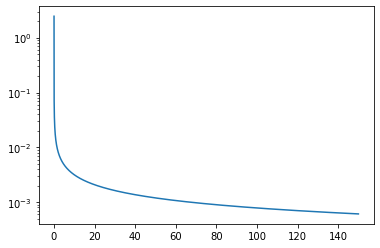

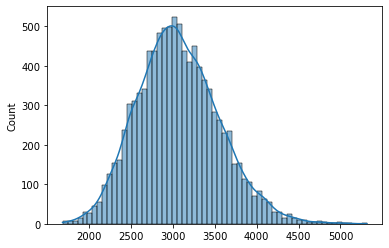

We are 95% confident that the average expenditure on Detergents and Paper products will fall between 2435.99 and 3327.0, while the mean is 3071.93


In [137]:
# Calculate basic statistics for the 'Detergents_Paper' category
Detergents_Paper_mean = np.mean(df['Detergents_Paper'])  # Calculate the mean of 'Detergents_Paper' spending
Detergents_Paper_st = np.std(df['Detergents_Paper'], ddof=1)  # Calculate the standard deviation with (ddof=1)
Detergents_Paper_n = df['Detergents_Paper'].shape[0]  # Count the number of observations in 'Detergents_Paper'

# Calculate the variance for the Gamma distribution (variance is squared standard deviation)
variance_gamma = frozen_st**2

# Calculate the shape (k) and scale (theta) parameters for the Gamma distribution
k_gamma = frozen_mean**2 / variance_gamma  # Shape parameter
theta_gamma = variance_gamma / frozen_mean  # Scale parameter

# Generate values for plotting the Gamma probability density function (PDF)
x = np.linspace(0, 150, 1000000)  # range of x values for plotting
y = stats.gamma.pdf(x, a=k_gamma, scale=theta_gamma)  # Calculate the PDF of Gamma distribution

# Plot the Gamma distribution with a logarithmic y-scale
plt.yscale('log')
plt.plot(x, y)
plt.show()

# Generate random samples and calculate sample means
num_samples_per_mean = 100  # Number of samples per each mean calculation
num_means = 10000  # Total number of means to generate

# Generate means from Gamma distributed random samples
means = [np.random.gamma(k_gamma, theta_gamma, num_samples_per_mean).mean() for _ in range(num_means)]

# Calculating the standard error for 'Detergents and Paper'
Detergents_Paper_se = Detergents_Paper_st / np.sqrt(Detergents_Paper_n)  # Standard error

# Plot the distribution of the sample means
sns.histplot(means, kde=True)
plt.show()

# Calculate the 95% confidence interval for the mean of 'Detergents_Paper' spending
lower = Detergents_Paper_mean - 1.96 * Detergents_Paper_se
upper = Detergents_Paper_mean + 1.96 * Detergents_Paper_se

# Print the confidence interval and the mean
print(f'We are 95% confident that the average expenditure on Detergents and Paper products will fall between {round(lower,2)} and {round(upper,2)}, while the mean is {round(frozen_mean,2)}')

### Testing for Independence

$H_0 :$  There is no association between Channel sales and Regions

In [111]:
# Define row labels for the table corresponding to the 'Channel' categories
rowlabel = ['Channel 1', 'Channel 2']

# Define column labels for the table corresponding to the 'Region' categories
collabel = ['Region 1', 'Region 2', 'Region 3']

# Create a cross-tabulation table from the dataframe.
# The 'normalize = True' will show proportions (normalized frequencies) so each cell in the table represents the proportion of the total observations
# that fall into the corresponding 'Channel' and 'Region' category.
table = pd.crosstab(df['Channel'], df['Region'], margins=False, normalize=True)
table.index = rowlabel
table.columns = collabel
table


,Region 1,Region 2,Region 3
Channel 1,0.134091,0.063636,0.479545
Channel 2,0.040909,0.043182,0.238636


In [112]:
rowlabel = ['Channel 1','Channel 2']
collabel = ['Region 1','Region 2', 'Region 3']
prop = pd.crosstab(df['Channel'], df['Region'], margins = False, normalize= True)
prop.index=rowlabel
prop.columns=collabel
prop

,Region 1,Region 2,Region 3
Channel 1,0.134091,0.063636,0.479545
Channel 2,0.040909,0.043182,0.238636


In [113]:
# Convert the previously created 'table' into a
# 'Table' object from statsmodels.
table = sm.stats.Table(table)

# Print the fitted values of the table. Fitted values in the context of a contingency table
# are the expected frequencies of observations for each cell of the table under the null
# hypothesis of independence between the variables. In other words, it shows what the distribution
# of 'Channel' across 'Region' would look like if there were no association between the two.
print(table.fittedvalues)

# Perform a test for nominal association between 'Channel' and 'Region'. This test evaluates
# whether there is a statistically significant association between the two categorical variables.
# The test used here is likely a Chi-squared test of independence, which is common for this type
# of analysis. The result of this test includes the Chi-squared statistic and the p-value, among
# other details.
X2 = table.test_nominal_association()

# Print the result of the test for nominal association. This output will help in understanding
# whether there's evidence to reject the null hypothesis of independence between 'Channel' and
# 'Region'. A low p-value (typically <0.05) would indicate a significant association, suggesting
# that the distribution of channels differs across regions.
print(X2)


           Region 1  Region 2  Region 3
Channel 1  0.118523  0.072345  0.486405
Channel 2  0.056477  0.034473  0.231777
df          2
pvalue      0.9950699856167893
statistic   0.009884413987581248


In [114]:
table.standardized_resids    

,Region 1,Region 2,Region 3
Channel 1,0.087638,-0.060306,-0.032613
Channel 2,-0.087638,0.060306,0.032613


Based on the results for the Chi-squared test, there is no dependence between the channels and the regions. 


p-Val = .099


Chi-squared Statistic: .009


***Sales Startegy:***
- We can execute a sales strategy that is uniform across channel or region. This means that we can design a marketing campaign that is the same across all channels and regions.

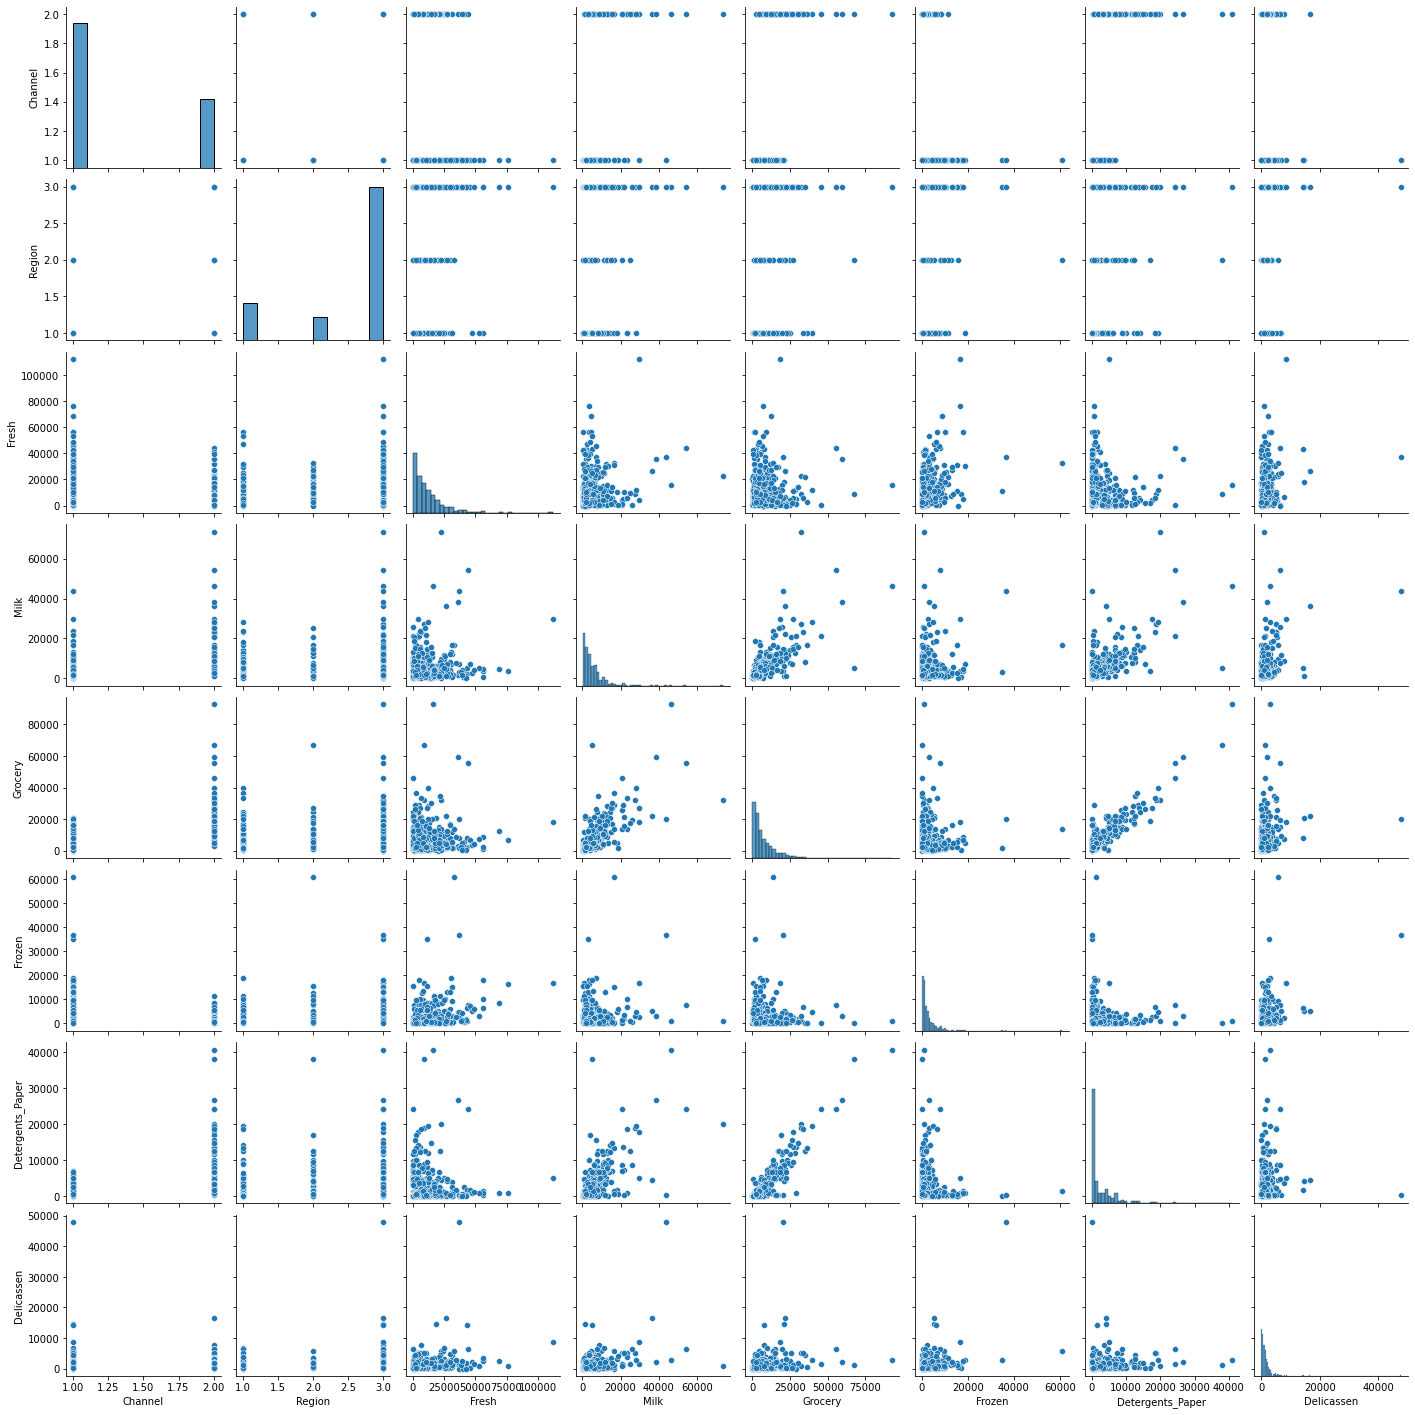

In [115]:
sns.pairplot(data=df)#Plotting several scatter plots to see the correlation between each variable
plt.show();

In [118]:
import statsmodels.formula.api as smf

fitd = smf.ols(formula='Grocery~  Milk + Detergents_Paper ', data = df).fit()#Fitting a Linear Model  To  Build an equation to predict how much groceries will be bought
print(fitd.summary())

                            OLS Regression Results                            
Dep. Variable:                Grocery   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1588.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):          3.44e-201
Time:                        17:50:18   Log-Likelihood:                -4189.2
No. Observations:                 440   AIC:                             8384.
Df Residuals:                     437   BIC:                             8397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1882.2681    201.664  